In [13]:
from util import parse_graph_from_edgelist_file, visualize_fvs
from solver import FeedbackVertexSetSolverSAT
from greedy import greedy_fvs
import networkx as nx

# Feedback Vertex Set
The *Feedback Vertex Set* (FVS) problem is a problem in graph theory. For a given graph G (directed or undirected) and a natural number k, this decision problem asks whether there exists a set of k vertices, whose removal would eliminate all cycles in G. In other words, it is to be determined whether a set of k vertices suffices to "cover" all cycles in G. This problem is proven to be NP-hard, which means that there exists no algorithm that can solve the problem on arbitrary graphs in polynomial time (unless P = NP).

The *Minimum FVS* problem asks for the smallest Feedback Vertex Set in G. Such a set can be found by solving the associated decision problem with different values for k (i.e. using binary search on k), until the smallest solution is found (feasible with k=x, infeasible with k=x-1).

In this example, the FVS decision problem is modeled as a Satisfiability (SAT) problem (including cardinality constraints).

### Load the test graph, draw it using a "nice" layout.

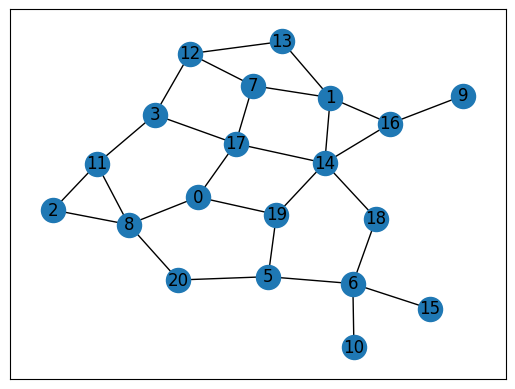

In [14]:
G = parse_graph_from_edgelist_file("instances/graph1.edges")
# G = nx.generators.fast_gnp_random_graph(25, 0.3)
nx.draw_networkx(G, pos=nx.layout.kamada_kawai_layout(G))

## Find a greedy solution

The greedy solution {'17', '8', '1', '6'} has size 4!


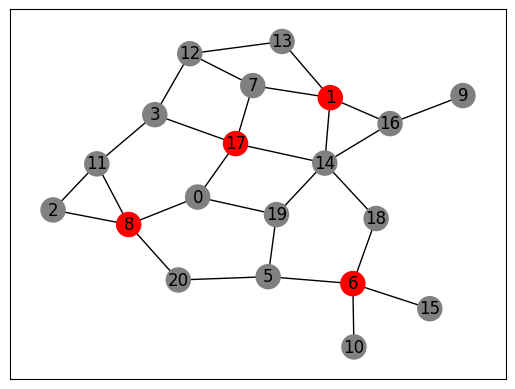

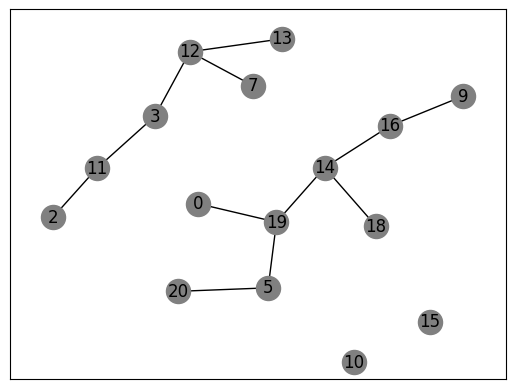

In [15]:
greedy_solution = greedy_fvs(G)
assert nx.is_forest(G.subgraph(set(G.nodes()) - greedy_solution))

print(f"The greedy solution {greedy_solution} has size {len(greedy_solution)}!")
visualize_fvs(G, greedy_solution)

## Use the exact solver using Cardinality SAT to find the optimal solution

Number of cycles in cycle basis: 9
A greedy solution of size 4 was found!
k = 2: UNSAT
k = 3: SAT
A solution of size 3 was found by the solver!
The solution of size 3 was proven to be optimal!
{'8', '7', '14'}
The optimal solution is 25.0% smaller than the heuristic solution!


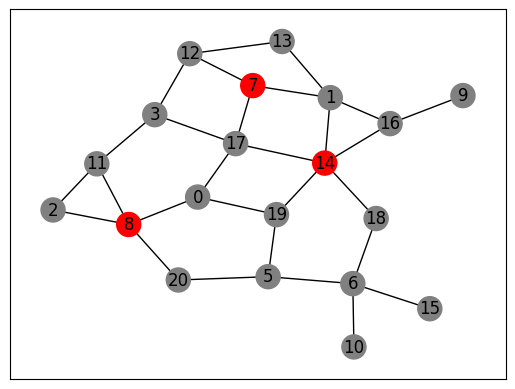

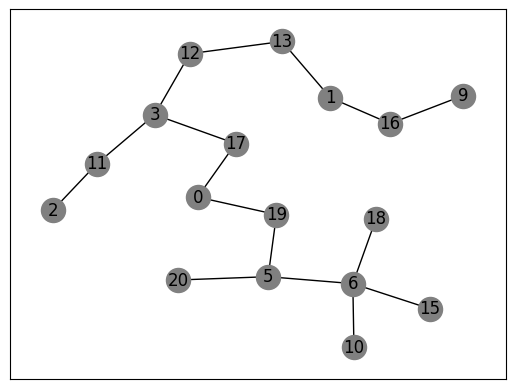

In [16]:
fbv_solver = FeedbackVertexSetSolverSAT(G)
optimal_solution = fbv_solver.find_optimum()
print(optimal_solution)
print(f"The optimal solution is {round(100.0 -  100.0 * len(optimal_solution) / len(greedy_solution), ndigits=2)}% smaller than the heuristic solution!")
visualize_fvs(G, feedback_vertex_set=optimal_solution)

assert nx.is_forest(G.subgraph(set(G.nodes()) - optimal_solution))